In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
data=pd.read_csv('/content/sample_data/recipes.csv')

In [17]:
data.head()


,RecipeId,Name,AuthorId,AuthorName,CookTime,PrepTime,TotalTime,DatePublished,Description,Images,...,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings,RecipeYield,RecipeInstructions
0,38,Low-Fat Berry Blue Frozen Dessert,1533,Dancer,PT24H,PT45M,PT24H45M,1999-08-09T21:46:00Z,Make and share this Low-Fat Berry Blue Frozen ...,"c(""https://img.sndimg.com/food/image/upload/w_...",...,1.3,8.0,29.8,37.1,3.6,30.2,3.2,4.0,NaN,"c(""Toss 2 cups berries with sugar."", ""Let stan..."
1,39,Biryani,1567,elly9812,PT25M,PT4H,PT4H25M,1999-08-29T13:12:00Z,Make and share this Biryani recipe from Food.com.,"c(""https://img.sndimg.com/food/image/upload/w_...",...,16.6,372.8,368.4,84.4,9.0,20.4,63.4,6.0,NaN,"c(""Soak saffron in warm milk for 5 minutes and..."
2,40,Best Lemonade,1566,Stephen Little,PT5M,PT30M,PT35M,1999-09-05T19:52:00Z,This is from one of my first Good House Keepi...,"c(""https://img.sndimg.com/food/image/upload/w_...",...,0.0,0.0,1.8,81.5,0.4,77.2,0.3,4.0,NaN,"c(""Into a 1 quart Jar with tight fitting lid, ..."
3,41,Carina's Tofu-Vegetable Kebabs,1586,Cyclopz,PT20M,PT24H,PT24H20M,1999-09-03T14:54:00Z,This dish is best prepared a day in advance to...,"c(""https://img.sndimg.com/food/image/upload/w_...",...,3.8,0.0,1558.6,64.2,17.3,32.1,29.3,2.0,4 kebabs,"c(""Drain the tofu, carefully squeezing out exc..."
4,42,Cabbage Soup,1538,Duckie067,PT30M,PT20M,PT50M,1999-09-19T06:19:00Z,Make and share this Cabbage Soup recipe from F...,"""https://img.sndimg.com/food/image/upload/w_55...",...,0.1,0.0,959.3,25.1,4.8,17.7,4.3,4.0,NaN,"c(""Mix everything together and bring to a boil..."



Exploring the data

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49970 entries, 0 to 49969
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   RecipeId                    49970 non-null  int64  
 1   Name                        49970 non-null  object 
 2   AuthorId                    49970 non-null  int64  
 3   AuthorName                  49970 non-null  object 
 4   CookTime                    40165 non-null  object 
 5   PrepTime                    49970 non-null  object 
 6   TotalTime                   49970 non-null  object 
 7   DatePublished               49970 non-null  object 
 8   Description                 49965 non-null  object 
 9   Images                      49969 non-null  object 
 10  RecipeCategory              49969 non-null  object 
 11  Keywords                    49493 non-null  object 
 12  RecipeIngredientQuantities  49968 non-null  object 
 13  RecipeIngredientParts       499

In [28]:
data.shape

(49970, 28)

In [29]:
data.describe()

,RecipeId,AuthorId,AggregatedRating,ReviewCount,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings
count,49970.000000,4.997000e+04,38536.000000,39102.000000,49969.000000,49969.000000,49969.000000,49969.000000,4.996900e+04,49969.000000,49969.000000,49969.000000,49969.000000,29757.000000
mean,28349.101201,2.904278e+04,4.603150,10.530740,577.794256,28.937319,11.628772,100.709452,9.013325e+02,61.902666,4.176457,30.988237,18.762088,7.810230
std,14977.137405,2.740657e+04,0.640751,40.063699,1029.741756,60.039545,27.054799,216.407014,7.663507e+03,140.358425,7.847605,100.415804,30.884514,31.177285
min,38.000000,2.700000e+01,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1.000000
25%,15724.250000,1.029000e+04,4.500000,2.000000,171.200000,5.200000,1.400000,4.000000,1.170000e+02,12.600000,0.800000,2.500000,3.400000,4.000000
50%,28499.500000,2.639900e+04,5.000000,3.000000,324.400000,13.900000,4.900000,44.900000,3.540000e+02,28.500000,2.100000,6.900000,9.000000,6.000000
75%,41229.750000,3.853200e+04,5.000000,8.000000,561.400000,28.900000,11.600000,113.800000,8.161000e+02,54.600000,4.600000,21.500000,25.900000,8.000000
max,54045.000000,1.047030e+06,5.000000,3063.000000,43924.600000,2128.500000,1277.100000,9856.400000,1.246921e+06,6826.200000,301.300000,4735.800000,1319.200000,3800.000000


In [30]:
data.nunique()

RecipeId                      49970
Name                          45656
AuthorId                       4418
AuthorName                     4409
CookTime                        279
PrepTime                        144
TotalTime                       608
DatePublished                  9447
Description                   47906
Images                        15100
RecipeCategory                  221
Keywords                      33075
RecipeIngredientQuantities    46660
RecipeIngredientParts         48875
AggregatedRating                  9
ReviewCount                     336
Calories                      13649
FatContent                     2605
SaturatedFatContent            1535
CholesterolContent             5024
SodiumContent                 17142
CarbohydrateContent            4161
FiberContent                    647
SugarContent                   3064
ProteinContent                 1560
RecipeServings                   76
RecipeYield                    5594
RecipeInstructions          

In [31]:
data.isnull().sum()

RecipeId                          0
Name                              0
AuthorId                          0
AuthorName                        0
CookTime                       9805
PrepTime                          0
TotalTime                         0
DatePublished                     0
Description                       5
Images                            1
RecipeCategory                    1
Keywords                        477
RecipeIngredientQuantities        2
RecipeIngredientParts             1
AggregatedRating              11434
ReviewCount                   10868
Calories                          1
FatContent                        1
SaturatedFatContent               1
CholesterolContent                1
SodiumContent                     1
CarbohydrateContent               1
FiberContent                      1
SugarContent                      1
ProteinContent                    1
RecipeServings                20213
RecipeYield                   34436
RecipeInstructions          

**Data Cleaning**

In [32]:
data.isnull().sum()

RecipeId                          0
Name                              0
AuthorId                          0
AuthorName                        0
CookTime                       9805
PrepTime                          0
TotalTime                         0
DatePublished                     0
Description                       5
Images                            1
RecipeCategory                    1
Keywords                        477
RecipeIngredientQuantities        2
RecipeIngredientParts             1
AggregatedRating              11434
ReviewCount                   10868
Calories                          1
FatContent                        1
SaturatedFatContent               1
CholesterolContent                1
SodiumContent                     1
CarbohydrateContent               1
FiberContent                      1
SugarContent                      1
ProteinContent                    1
RecipeServings                20213
RecipeYield                   34436
RecipeInstructions          

In [33]:
copy_data = data.copy()

In [34]:
copy_data.dropna(how = 'any', inplace = True)

In [35]:
copy_data.isnull().sum()

RecipeId                      0
Name                          0
AuthorId                      0
AuthorName                    0
CookTime                      0
PrepTime                      0
TotalTime                     0
DatePublished                 0
Description                   0
Images                        0
RecipeCategory                0
Keywords                      0
RecipeIngredientQuantities    0
RecipeIngredientParts         0
AggregatedRating              0
ReviewCount                   0
Calories                      0
FatContent                    0
SaturatedFatContent           0
CholesterolContent            0
SodiumContent                 0
CarbohydrateContent           0
FiberContent                  0
SugarContent                  0
ProteinContent                0
RecipeServings                0
RecipeYield                   0
RecipeInstructions            0
dtype: int64

In [36]:
ana_copy_data=data.copy()     #for analysis later

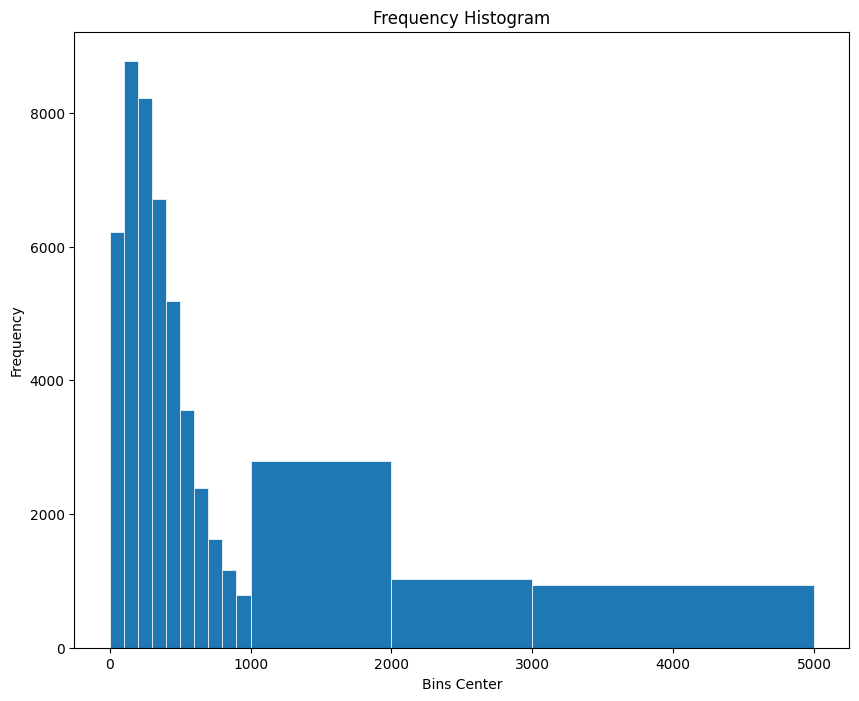

In [37]:
fig, ax = plt.subplots(figsize=(10, 8))
plt.title('Frequency Histogram')
plt.ylabel('Frequency')
plt.xlabel('Bins Center')
ax.hist(data.Calories.to_numpy(),bins=[0,100,200,300,400,500,600,700,800,900,1000,1000,2000,3000,5000],linewidth=0.5, edgecolor="white")
plt.show()

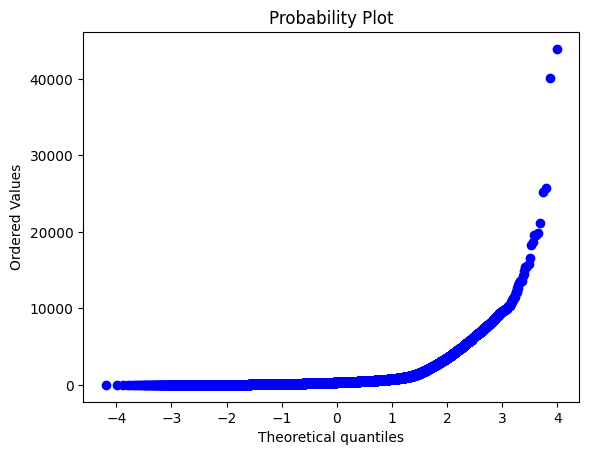

In [38]:
import pylab
import scipy.stats as stats
stats.probplot(data.Calories.to_numpy(), dist="norm", plot=pylab)
pylab.show()

**Preparing the Data**

We start by extracting the columns that we are interessted in. Since we are building a recommendation engine that takes the recipes nutritional characteristics, we start by extracting a sub data with the relevant columns. We may still need other columns for our project. However, we will mainly use the columns with nutritional information for trainning our model.

In [39]:
dataset=data.copy()
columns=['RecipeId','Name','CookTime','PrepTime','TotalTime','RecipeIngredientParts','Calories','FatContent','SaturatedFatContent','CholesterolContent','SodiumContent','CarbohydrateContent','FiberContent','SugarContent','ProteinContent','RecipeInstructions']
dataset=dataset[columns]

In [40]:
max_Calories=2000
max_daily_fat=100
max_daily_Saturatedfat=13
max_daily_Cholesterol=300
max_daily_Sodium=2300
max_daily_Carbohydrate=325
max_daily_Fiber=40
max_daily_Sugar=40
max_daily_Protein=200
max_list=[max_Calories,max_daily_fat,max_daily_Saturatedfat,max_daily_Cholesterol,max_daily_Sodium,max_daily_Carbohydrate,max_daily_Fiber,max_daily_Sugar,max_daily_Protein]

In [41]:
extracted_data=dataset.copy()
for column,maximum in zip(extracted_data.columns[6:15],max_list):
    extracted_data=extracted_data[extracted_data[column]<maximum]

In [42]:
extracted_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34232 entries, 0 to 49968
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   RecipeId               34232 non-null  int64  
 1   Name                   34232 non-null  object 
 2   CookTime               27553 non-null  object 
 3   PrepTime               34232 non-null  object 
 4   TotalTime              34232 non-null  object 
 5   RecipeIngredientParts  34232 non-null  object 
 6   Calories               34232 non-null  float64
 7   FatContent             34232 non-null  float64
 8   SaturatedFatContent    34232 non-null  float64
 9   CholesterolContent     34232 non-null  float64
 10  SodiumContent          34232 non-null  float64
 11  CarbohydrateContent    34232 non-null  float64
 12  FiberContent           34232 non-null  float64
 13  SugarContent           34232 non-null  float64
 14  ProteinContent         34232 non-null  float64
 15  RecipeI

In [43]:
extracted_data.iloc[:,6:15].corr()

,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent
Calories,1.000000,0.760094,0.602712,0.481209,0.496272,0.716999,0.453022,0.193833,0.679931
FatContent,0.760094,1.000000,0.775201,0.447479,0.386146,0.214504,0.186431,0.050721,0.469217
SaturatedFatContent,0.602712,0.775201,1.000000,0.522678,0.336816,0.166430,0.048942,0.076432,0.401071
CholesterolContent,0.481209,0.447479,0.522678,1.000000,0.342607,0.060488,-0.048515,-0.046578,0.690146
SodiumContent,0.496272,0.386146,0.336816,0.342607,1.000000,0.279264,0.251172,-0.044616,0.495106
CarbohydrateContent,0.716999,0.214504,0.166430,0.060488,0.279264,1.000000,0.574825,0.398578,0.236678
FiberContent,0.453022,0.186431,0.048942,-0.048515,0.251172,0.574825,1.000000,0.086879,0.243628
SugarContent,0.193833,0.050721,0.076432,-0.046578,-0.044616,0.398578,0.086879,1.000000,-0.122842
ProteinContent,0.679931,0.469217,0.401071,0.690146,0.495106,0.236678,0.243628,-0.122842,1.000000


In [44]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
prep_data=scaler.fit_transform(extracted_data.iloc[:,6:15].to_numpy())

In [45]:
prep_data

array([[-0.4998276 , -0.8759144 , -0.76813447, ...,  0.23345666,
         2.27559642, -0.66095234],
       [ 1.50046849,  1.17930556, -0.05885112, ...,  4.21440856,
         2.47797076,  1.28518199],
       [-0.86844734, -1.07665682, -1.10859048, ...,  0.58215317,
         0.94418632, -0.57893135],
       ...,
       [ 2.04381289, -0.11118139, -0.17233646, ...,  0.98896578,
        -0.03573151,  0.74831735],
       [ 0.01120095,  0.8351757 , -0.42767846, ...,  1.19237208,
         0.08143258, -0.55656199],
       [-0.76657026, -0.32148297,  0.05463421, ..., -0.66734268,
        -0.86653142, -0.43725874]])

***Trainning the model***

In [46]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(metric='cosine',algorithm='brute')
neigh.fit(prep_data)

NearestNeighbors(algorithm='brute', metric='cosine')

In [47]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
transformer = FunctionTransformer(neigh.kneighbors,kw_args={'return_distance':False})
pipeline=Pipeline([('std_scaler',scaler),('NN',transformer)])

In [48]:
params={'n_neighbors':10,'return_distance':False}
pipeline.get_params()
pipeline.set_params(NN__kw_args=params)

Pipeline(steps=[('std_scaler', StandardScaler()),
                ('NN',
                 FunctionTransformer(func=<bound method KNeighborsMixin.kneighbors of NearestNeighbors(algorithm='brute', metric='cosine')>,
                                     kw_args={'n_neighbors': 10,
                                              'return_distance': False}))])

In [49]:
pipeline.transform(extracted_data.iloc[0:1,6:15].to_numpy())[0]

array([    0, 19679, 26112,  1362, 28669, 28131,  3409, 19963, 10838,
        1922])

**Testing the model**

In [51]:
extracted_data.iloc[pipeline.transform(extracted_data.iloc[0:1,6:15].to_numpy())[0]]

,RecipeId,Name,CookTime,PrepTime,TotalTime,RecipeIngredientParts,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeInstructions
0,38,Low-Fat Berry Blue Frozen Dessert,PT24H,PT45M,PT24H45M,"c(""blueberries"", ""granulated sugar"", ""vanilla ...",170.9,2.5,1.3,8.0,29.8,37.1,3.6,30.2,3.2,"c(""Toss 2 cups berries with sugar."", ""Let stan..."
28595,32172,L & B's Concoction,PT5M,PT5M,PT10M,"c(""strawberry"", ""strawberry"", ""milk"", ""blueber...",167.3,2.0,1.0,5.7,26.2,38.4,3.0,29.9,3.1,"c(""Blend the frozen strawberries, ice cubes, y..."
37917,41682,Cheesy Apple Pie in a Glass,PT30M,PT25M,PT55M,"c(""Red Delicious apples"", ""brown sugar"", ""rais...",167.3,0.4,0.1,0.0,9.2,42.3,3.7,35.4,0.6,"c(""Combine first 6 ingredients and 1/4 tsp all..."
2231,3741,Whole-Berry Cranberry Sauce,PT15M,PT5M,PT20M,"c(""fresh cranberries"", ""water"", ""sugar"")",165.7,0.1,0.0,0.0,3.1,43.1,3.7,36.5,0.3,"c(""Combine all ingredients in a medium saucepa..."
41757,45633,Chunky Applesauce,PT8H,PT10M,PT8H10M,"c(""apples"", ""water"", ""sugar"", ""cinnamon"")",159.1,0.3,0.1,0.0,2.4,41.8,4.4,35.5,0.5,"c(""Put all ingredients in crockpot."", ""Cover a..."
40954,44796,Banana Bonkers,NaN,PT20M,PT20M,"c(""bananas"", ""grapefruit juice"")",171.7,1.3,0.7,0.0,25.3,39.8,3.3,30.4,1.8,"c(""Puree bananas in a blender or food processo..."
5505,8474,Roasted Rosemary Skewered Figs,PT45M,PT10M,PT55M,"c(""fresh figs"", ""fresh rosemary"", ""maple syrup...",164.9,0.6,0.1,0.0,3.5,42.3,4.4,36.3,1.2,"c(""preheat oven to 400 degrees. Skewer 3 whole..."
28996,32581,Easy Baked Apples,PT8M,PT8M,PT16M,"c(""raisins"", ""coconut"", ""tart apples"", ""cinnam...",165.4,1.8,0.2,0.0,23.8,39.4,3.9,31.6,1.0,"c(""Combine nuts, raisins, and coconut."", ""Core..."
16010,19336,Sparkling Raspberry Lemonade,PT3M,PT35M,PT38M,"c(""frozen unsweetened raspberries"", ""sugar"", ""...",169.6,0.4,0.0,0.0,12.3,43.9,4.0,36.9,0.9,"c(""Combine frozen raspberries, sugar and 1/2 c..."
3221,4929,Cranberry Orange &amp; Port Sauce,PT20M,PT10M,PT30M,"c(""cranberries"", ""oranges"", ""sugar"", ""port wine"")",185.3,0.1,0.0,0.0,3.5,40.6,3.7,33.4,0.7,"c(""Place the cranberries and the zest and juic..."


In [52]:
extracted_data[extracted_data['RecipeIngredientParts'].str.contains("egg",regex=False)]

,RecipeId,Name,CookTime,PrepTime,TotalTime,RecipeIngredientParts,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeInstructions
3,41,Carina's Tofu-Vegetable Kebabs,PT20M,PT24H,PT24H20M,"c(""extra firm tofu"", ""eggplant"", ""zucchini"", ""...",536.1,24.0,3.8,0.0,1558.6,64.2,17.3,32.1,29.3,"c(""Drain the tofu, carefully squeezing out exc..."
7,45,Buttermilk Pie With Gingersnap Crumb Crust,PT50M,PT30M,PT1H20M,"c(""sugar"", ""margarine"", ""egg"", ""flour"", ""salt""...",228.0,7.1,1.7,24.5,281.8,37.5,0.5,24.7,4.2,"c(""Preheat oven to 350°F."", ""Make pie crust, u..."
12,50,Biscotti Di Prato,PT50M,PT20M,PT1H10M,"c(""flour"", ""sugar"", ""baking powder"", ""salt"", ""...",89.4,2.6,0.3,16.6,23.5,14.5,0.8,7.3,2.3,"c(""EGG WASH 1 Egg, large 1 tsp Water In the bo..."
18,56,Buttermilk Pie,PT1H,PT20M,PT1H20M,"c(""butter"", ""margarine"", ""sugar"", ""flour"", ""eg...",395.9,19.1,9.8,101.5,269.8,52.2,0.7,39.9,5.0,"c(""Preheat oven to 400°F."", ""Beat the butter a..."
22,60,Blueberry Dessert,NaN,PT35M,PT35M,"c(""Bisquick baking mix"", ""sugar"", ""butter"", ""m...",381.1,17.3,8.8,62.1,437.6,54.5,1.6,36.9,3.9,"c(""Heat oven to 400 degrees."", ""Mix 2 cups bak..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49954,54030,Banana Buttermilk Muffins,PT25M,PT30M,PT55M,"c(""self-raising flour"", ""baking soda"", ""salt"",...",184.1,9.7,1.5,18.2,164.3,23.4,1.1,15.5,2.1,"c(""Preheat the oven to 210 deg C."", ""Grease a ..."
49955,54031,Courgette Peanut Burgers,PT15M,PT15M,PT30M,"c(""courgettes"", ""roasted peanuts"", ""eggs"", ""fr...",704.0,48.8,7.7,211.5,741.2,47.1,7.8,6.2,25.8,"c(""Squeeze excess moisture from courgettes."", ..."
49958,54034,Banana Pound Cake the Easy Way,PT1H,PT10M,PT1H10M,"c(""eggs"", ""water"", ""nutmeg"", ""bananas"", ""vanil...",236.6,9.6,1.6,47.2,329.5,34.9,0.7,22.0,3.2,"c(""Combine all ingredients in large mixer bowl..."
49963,54039,Goldfish Cakes,PT15M,PT10M,PT25M,"c(""vegetable shortening"", ""flour"", ""milk"", ""on...",375.3,18.2,5.6,96.3,403.1,21.8,1.2,1.5,29.4,"c(""In a saucepan, melt the 3 Tbs vegetable sho..."


**Creating an end to end function**

In [53]:
def scaling(dataframe):
    scaler=StandardScaler()
    prep_data=scaler.fit_transform(dataframe.iloc[:,6:15].to_numpy())
    return prep_data,scaler

def nn_predictor(prep_data):
    neigh = NearestNeighbors(metric='cosine',algorithm='brute')
    neigh.fit(prep_data)
    return neigh

def build_pipeline(neigh,scaler,params):
    transformer = FunctionTransformer(neigh.kneighbors,kw_args=params)
    pipeline=Pipeline([('std_scaler',scaler),('NN',transformer)])
    return pipeline

def extract_data(dataframe,ingredient_filter,max_nutritional_values):
    extracted_data=dataframe.copy()
    for column,maximum in zip(extracted_data.columns[6:15],max_nutritional_values):
        extracted_data=extracted_data[extracted_data[column]<maximum]
    if ingredient_filter!=None:
        for ingredient in ingredient_filter:
            extracted_data=extracted_data[extracted_data['RecipeIngredientParts'].str.contains(ingredient,regex=False)]
    return extracted_data

def apply_pipeline(pipeline,_input,extracted_data):
    return extracted_data.iloc[pipeline.transform(_input)[0]]

def recommand(dataframe,_input,max_nutritional_values,ingredient_filter=None,params={'return_distance':False}):
    extracted_data=extract_data(dataframe,ingredient_filter,max_nutritional_values)
    prep_data,scaler=scaling(extracted_data)
    neigh=nn_predictor(prep_data)
    pipeline=build_pipeline(neigh,scaler,params)
    return apply_pipeline(pipeline,_input,extracted_data)

In [57]:
test_input=extracted_data.iloc[0:1,6:15].to_numpy()
recommand(dataset,test_input,max_list)

,RecipeId,Name,CookTime,PrepTime,TotalTime,RecipeIngredientParts,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeInstructions
0,38,Low-Fat Berry Blue Frozen Dessert,PT24H,PT45M,PT24H45M,"c(""blueberries"", ""granulated sugar"", ""vanilla ...",170.9,2.5,1.3,8.0,29.8,37.1,3.6,30.2,3.2,"c(""Toss 2 cups berries with sugar."", ""Let stan..."
28595,32172,L & B's Concoction,PT5M,PT5M,PT10M,"c(""strawberry"", ""strawberry"", ""milk"", ""blueber...",167.3,2.0,1.0,5.7,26.2,38.4,3.0,29.9,3.1,"c(""Blend the frozen strawberries, ice cubes, y..."
37917,41682,Cheesy Apple Pie in a Glass,PT30M,PT25M,PT55M,"c(""Red Delicious apples"", ""brown sugar"", ""rais...",167.3,0.4,0.1,0.0,9.2,42.3,3.7,35.4,0.6,"c(""Combine first 6 ingredients and 1/4 tsp all..."
2231,3741,Whole-Berry Cranberry Sauce,PT15M,PT5M,PT20M,"c(""fresh cranberries"", ""water"", ""sugar"")",165.7,0.1,0.0,0.0,3.1,43.1,3.7,36.5,0.3,"c(""Combine all ingredients in a medium saucepa..."
41757,45633,Chunky Applesauce,PT8H,PT10M,PT8H10M,"c(""apples"", ""water"", ""sugar"", ""cinnamon"")",159.1,0.3,0.1,0.0,2.4,41.8,4.4,35.5,0.5,"c(""Put all ingredients in crockpot."", ""Cover a..."


In [58]:
dataset.head()

,RecipeId,Name,CookTime,PrepTime,TotalTime,RecipeIngredientParts,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeInstructions
0,38,Low-Fat Berry Blue Frozen Dessert,PT24H,PT45M,PT24H45M,"c(""blueberries"", ""granulated sugar"", ""vanilla ...",170.9,2.5,1.3,8.0,29.8,37.1,3.6,30.2,3.2,"c(""Toss 2 cups berries with sugar."", ""Let stan..."
1,39,Biryani,PT25M,PT4H,PT4H25M,"c(""saffron"", ""milk"", ""hot green chili peppers""...",1110.7,58.8,16.6,372.8,368.4,84.4,9.0,20.4,63.4,"c(""Soak saffron in warm milk for 5 minutes and..."
2,40,Best Lemonade,PT5M,PT30M,PT35M,"c(""sugar"", ""lemons, rind of"", ""lemon, zest of""...",311.1,0.2,0.0,0.0,1.8,81.5,0.4,77.2,0.3,"c(""Into a 1 quart Jar with tight fitting lid, ..."
3,41,Carina's Tofu-Vegetable Kebabs,PT20M,PT24H,PT24H20M,"c(""extra firm tofu"", ""eggplant"", ""zucchini"", ""...",536.1,24.0,3.8,0.0,1558.6,64.2,17.3,32.1,29.3,"c(""Drain the tofu, carefully squeezing out exc..."
4,42,Cabbage Soup,PT30M,PT20M,PT50M,"c(""plain tomato juice"", ""cabbage"", ""onion"", ""c...",103.6,0.4,0.1,0.0,959.3,25.1,4.8,17.7,4.3,"c(""Mix everything together and bring to a boil..."


In [60]:
dataset.to_csv('dataset.csv',index=False)
dataset.to_json('dataset.json')